<a href="https://colab.research.google.com/github/paulinawdowiak1/ML-Bootcamp/blob/main/supervised/ML_Bootcamp_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <a name='0'></a> Import bibliotek

In [2]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.0.2'

### <a name='1'></a> Wygenerowanie danych

In [31]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


### <a name='2'></a> Utworzenie kopii danych



In [32]:
df=df_raw.copy()
df.info() #zwraca info o danych, które nie są NaNami

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


In [33]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [34]:
df.isnull().sum() #zwraca nam sumę braków danych

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [35]:
df.isnull().sum().sum() #łączna liczbą Nanów w dataset

5

In [36]:
df.isnull().sum()/len(df) #procentowy brak danych dla każdej kolumnny

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

In [37]:
#sprawdzamy NaNy w wybranej kolumnie
pd.isnull(df['size'])

0    False
1    False
2    False
3     True
4    False
5    False
Name: size, dtype: bool

In [38]:
#zwracanie wierszy w wybranej kolumnie gdzie mamy NaNy
df[pd.isnull(df['size'])]

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no


In [39]:
#zwracanie wierszy poza wierszem z NaN dla wybranej kolumny
df[~pd.isnull(df['size'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [40]:
#to samo tylko opcją przeciwna do notnull


In [41]:
df[pd.notnull(df['size'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


#Uzupełnianie braków danych - SimpleImputer

In [42]:
#wstawianie danych w miejsce NaNów
from sklearn.impute import SimpleImputer

#strategy: 'mean', 'median', 'most_frequent', 'constant'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])

SimpleImputer()

In [43]:
#policzona wartość, która zostanie wstawiona w miejsce NaNów
imputer.statistics_

array([415.])

In [44]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [45]:
#przypisanie danych na stałe do datasetu
df['weight'] = imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [46]:
#opcją strategy= constant określamy stałą wartość jaką chcemy wprowadzić
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.00)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [47]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [48]:
#size i price nie sa zaktualizowane bo nie zostały przypisane na stale wyniki SimpleImputer
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [49]:
# strategy = 'most_frequent' wrzuca najczęściej występująca zmienna
imputer = SimpleImputer(missing_values=np.nan, strategy= 'most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

#Uzupełnianie braków - opcja *fillna()*

In [50]:
#wszystkie NAN zastępujemy określoną przez nas wartością
df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [56]:
#nadpisanie NaN w kolumnie, parametr inplace=True automatycznie nadpisuje wartosi w df, 
#nie trzeba ich przypisywac jak w SimpleImputer
df['size'].fillna(value ='L', inplace=True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [66]:
#method='bfill' NaN jest zastąpiony wartością z kolejnego wiersza
#method='ffill' NaN jest zastąpiony wartością z poprzedniego wiersza
df['price'].fillna(method='bfill', axis=0, inplace=True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,129.0,300.0,yes
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


#Usuwanie braków danych - opcja *dropna()*

In [67]:
#usuwanie wierszy z brakiem danych, jeśli chcemy usunąć kolumny wrzucamy dropna(axis=1)
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [68]:
#nadpisanie DF nowym data setem po usunięciu braków
df=df.dropna()

#Braki danych w szeregach czasowych

In [3]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


In [4]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters
sns.set()

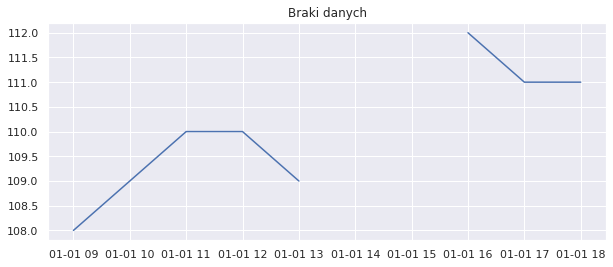

In [6]:
plt.figure(figsize=(10,4))
plt.title('Braki danych')
_=plt.plot(df.price)

In [7]:
import plotly.express as px
df_plotly = df.reset_index()
px.line(df_plotly, 'index','price', width=600, height=400,
        title='Szeregi czasowe - brak danych')

In [9]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600, height=400,
        title='Szeregi czasowe - braki danych po usunięciu NaNów')

In [10]:
#wstawienie 0 - nierekomendowane
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title='Szeregi czasowe - braki danych - wstawianie 0')

In [11]:
#wypełnienie braków danych średnią - REKOMENDOWANA
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df.plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=600,height=400,
        title='Szeregi czasowe - braki danych - wstawienie średniej')

In [14]:
#interpolate - uzupelnic braki wartoscia przewidziana przez system - REKOMENDOWANA
df_plotly = df.reset_index()
df_plotly['price_fill']=df_plotly['price'].interpolate()
px.line(df_plotly, 'index','price_fill', width=600, height= 400,
        title='Szeregi czasowe - braki danych - interpolacja')

In [16]:
#metoda forward fill - wstawienie tego co zaobserwowano jako ostatnie
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill',width=600, height=400,
        title = "Szeregi czasowe - brak dany - wypelnienie ffill")

In [17]:
#metoda backward fill - wstawienie tego co zaobserwowano jako kolejne (ostatnia zaobserwowana wartosć)
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill',width=600, height=400,
        title = "Szeregi czasowe - brak dany - wypelnienie ffill")